# Aula 10A - Missing Values

- **Missing Values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados

- Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes

- Estes também podem atrapalhar resultados de análises

- Nesta aula veremos como encontrar missing values na base de dados e como manipular esses valores

In [0]:
import pandas as pd

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/Data Science do ZERO/5 - Python para Análise de Dados/Materiais Disponibilizados/Pandas - Materiais de Apoio/kc_house_data.csv'
df = pd.read_csv (path,sep=',',header=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## df.isnull( ).sum( )

- Retorna o número de valores faltantes por coluna/atributo do df

In [5]:
# Apenas as colunas "bedrooms" e "floors" apresentam MV
df.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## df.dropna (inplace = bool)

- Deleta todas as linhas que apresentam pelo menos um MV
- Parâmetro "inplace":
    - True --> as alterações persistem na memória
    - False (default) --> as alterações NÃO persistem na memória
- Parâmetro "how":
    - 'all' --> remove apenas linhas que apresentem MV para todos os atributos
    - 'any' (default) --> remove linhas que apresentem pelo menos um MV

In [0]:
# Removendo todas as linhas que apresentam MV
df.dropna(inplace=True)

In [7]:
# Note que todas as linhas com MV foram excluídas
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Vamos recarregar o dataset
df = pd.read_csv (path,sep=',',header=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Observe que, como importamos o df de novo, existem MV
df.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# Remoção apenas das linhas que tenham todos os seus valores faltantes
df.dropna(how='all', inplace=True)

In [11]:
# Note que como nenhuma linha apresenta todos os seus valores faltantes, nenhuma
# linha foi removida
df.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## df [ 'col_name' ].fillna (n, inplace = bool)

- Preenche MV de uma determinada coluna por um determinado valor "n"
- Parâmetro "inplace":
    - True --> as alterações persistem na memória
    - False (default) --> as alterações NÃO persistem na memória

### Substituido MV de um Atributo pelo Valor Médio desse Atributo

In [0]:
# Substituindo MV pelo valor médio do número de andares
df.floors.fillna(df['floors'].mean(),inplace=True)

In [27]:
# Note que não existem mais MV na coluna "floors" após a alteração
df.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Substituindo MV por um valor

In [0]:
# Substituindo MV da coluna "bedrooms" pelo valor 1
df.fillna(1,inplace=True)

In [29]:
# Note que não existem mais MV na coluna "bedrooms" após a alteração
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Aula 10B - Visualização de Dados com a Biblioteca Matplotlib

- Podemos plotar alguns tipos de gráficos disponíveis na biblioteca Matplotlib sem mesmo importar essa biblioteca
- Para isso devemos digitar **%matplotlib inline** que o Pandas passa a ter uma ligação com Matplotlib

In [32]:
path = '/content/drive/My Drive/Colab Notebooks/Data Science do ZERO/5 - Python para Análise de Dados/Materiais Disponibilizados/Pandas - Materiais de Apoio/kc_house_data.csv'
df = pd.read_csv (path,sep=',',header=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## df [ 'col_name' ].plot ( kind = 'bar' )

- Plota gráfico de barras
- O parâmetro "kind" default gera um gráfico de barras

In [0]:
# Criando link entre Matplotlib e Pandas
%matplotlib inline

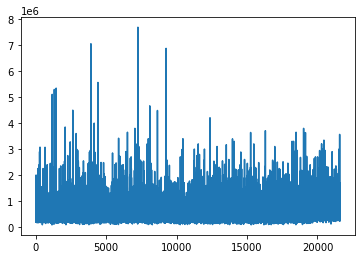

In [36]:
# Gráfico de barras
df['price'].plot()

## df.plot (x = 'col_name' , y = 'col_name' , kind = 'scatter' , title = 'title' , color = 'r'/'y' )

- Plota um scatterplot

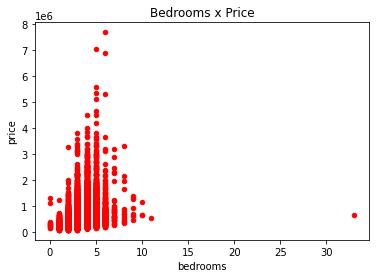

In [38]:
# Plota em gráfico de dispersão o preço e o numero de quartos de imóveis
df.plot(x='bedrooms',y='price',kind='scatter', title='Bedrooms x Price',color='r')

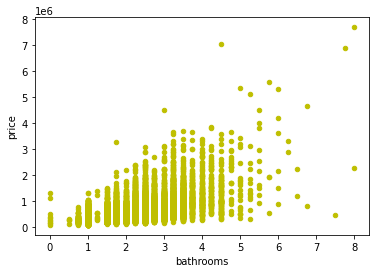

In [39]:
# Plota em gráfico de dispersão o preço e o número de banheiros
df.plot(x='bathrooms',y='price',kind='scatter',color='y')